# Lab 03 : Loss and error rate -- demo

In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    # find automatically the path of the folder containing "file_name" :
    file_name = 'monitoring_loss_demo.ipynb'
    import subprocess
    path_to_file = subprocess.check_output('find . -type f -name ' + str(file_name), shell=True).decode("utf-8")
    path_to_file = path_to_file.replace(file_name,"").replace('\n',"")
    # if previous search failed or too long, comment the previous line and simply write down manually the path below :
    #path_to_file = '/content/gdrive/My Drive/CS5242_2021_codes/codes/labs_lecture05/lab03_monitoring_loss'
    print(path_to_file)
    # change current path to the folder containing "file_name"
    os.chdir(path_to_file)
    !pwd

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from random import randint
import utils

### Download the data and print the sizes

In [3]:
from utils import check_mnist_dataset_exists
data_path=check_mnist_dataset_exists()

train_data=torch.load(data_path+'mnist/train_data.pt')
train_label=torch.load(data_path+'mnist/train_label.pt')
test_data=torch.load(data_path+'mnist/test_data.pt')

### Make a ONE layer net class. 

In [4]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(one_layer_net , self).__init__()
        self.linear_layer = nn.Linear( input_size, output_size , bias=False)
        
    def forward(self, x):
        scores = self.linear_layer(x)
        return scores

### Build the net

In [5]:
net=one_layer_net(784,10)
print(net)

one_layer_net(
  (linear_layer): Linear(in_features=784, out_features=10, bias=False)
)


### Choose the criterion, optimizer, batchsize, learning rate

In [6]:
criterion = nn.CrossEntropyLoss()

optimizer=torch.optim.SGD( net.parameters() , lr=0.01 )

bs=200

### Do 30 passes through the training set

In [7]:
for epoch in range(30):
    
    running_loss=0
    running_error=0
    num_batches=0
    
    shuffled_indices=torch.randperm(60000)
 
    for count in range(0,60000,bs):
    
        optimizer.zero_grad()
        
        indices=shuffled_indices[count:count+bs]
        minibatch_data =  train_data[indices]
        minibatch_label= train_label[indices]

        inputs = minibatch_data.view(bs,784)

        inputs.requires_grad_()

        scores=net( inputs ) 

        loss =  criterion( scores , minibatch_label) 
        
        loss.backward()

        optimizer.step()
        
        
        # compute and accumulate stats
        
        running_loss += loss.detach().item()
               
        error = utils.get_error( scores.detach() , minibatch_label)
        running_error += error.item()
        
        num_batches+=1
    
    
    # compute stats for the full training set
    total_loss = running_loss/num_batches
    total_error = running_error/num_batches
    
    print('epoch=',epoch, '\t loss=', total_loss , '\t error=', total_error*100 ,'percent')
        
    
        
        

epoch= 0 	 loss= 1.4497143075863521 	 error= 28.151666740576424 percent
epoch= 1 	 loss= 0.8504990108807882 	 error= 16.54666656255722 percent
epoch= 2 	 loss= 0.6839838814735413 	 error= 14.88999972740809 percent
epoch= 3 	 loss= 0.6033843239148458 	 error= 13.92333322763443 percent
epoch= 4 	 loss= 0.5545093576113383 	 error= 13.363333384195963 percent
epoch= 5 	 loss= 0.5210646479328473 	 error= 12.863333225250246 percent
epoch= 6 	 loss= 0.4964698022603989 	 error= 12.49833325544993 percent
epoch= 7 	 loss= 0.4774324160814285 	 error= 12.186667064825695 percent
epoch= 8 	 loss= 0.46213584661483764 	 error= 11.948333283265432 percent
epoch= 9 	 loss= 0.44958535840113956 	 error= 11.685000121593475 percent
epoch= 10 	 loss= 0.4389729890227318 	 error= 11.49833353360494 percent
epoch= 11 	 loss= 0.42984099497397743 	 error= 11.361666580041248 percent
epoch= 12 	 loss= 0.4219281133015951 	 error= 11.173333644866943 percent
epoch= 13 	 loss= 0.4149501564105352 	 error= 11.08000020186106

### Choose image at random from the test set and see how good/bad are the predictions

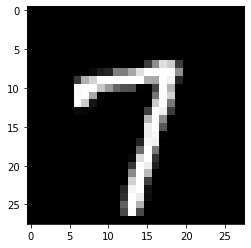

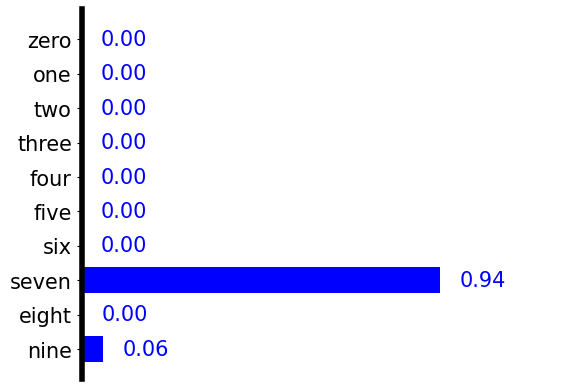

In [8]:
# choose a picture at random
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
scores =  net( im.view(1,784)) 
probs= torch.softmax(scores, dim=1)
utils.show_prob_mnist(probs)